<a href="https://colab.research.google.com/github/MHRDYN7/Pytorch_Practice/blob/main/Pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Helpers

In [ ]:
"""
nn.Module
nn.Linear(num_inputs, num_hidden)
nn.Tanh()
nn.BCEWithLogitsLoss() #loss
torch.optim.SGD(model.parameters(), lr=0.1) #optimizer
"""

In [ ]:
"""
import torch.nn.functional as F
import torch.utils.data as data
data.Dataset
data.DataLoader(dataset, batch_size=32, shuffle=True)
"""

In [ ]:
"""
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")


"""

In [ ]:
"""
dtypes

torch.float
torch.int/ torch.long

torch.float32: 32-bit floating point
torch.float64: 64-bit floating point
torch.float16: 16-bit floating point
torch.bfloat16: 16-bit floating point with reduced precision
torch.int8: 8-bit integer (signed)
torch.uint8: 8-bit integer (unsigned)
torch.int16: 16-bit integer (signed)
torch.int32: 32-bit integer (signed)
torch.int64: 64-bit integer (signed)
torch.bool: boolean (True or False)

"""

In [ ]:
torch.tensor([[1,2,3]]) # You can also insert a numpy array

tensor([[1, 2, 3]])

In [ ]:
torch.manual_seed(42)
torch.Tensor(1,2,3) # Enter the shape and get a randoom tensor

# Creates a different tensor every time
# Not sure about mean, std

tensor([[[0.0000e+00, 3.2646e-41, 1.8788e+31],
         [1.7220e+22, 2.1715e-18, 2.1157e+23]]])

In [ ]:
torch.manual_seed(42)
torch.rand(1,2,3) #creates the same tensor every time

tensor([[[0.8823, 0.9150, 0.3829],
         [0.9593, 0.3904, 0.6009]]])

"""
model.train() vs model.eval() vs require_grad vs inference_mode
"""

#Coding Starts

In [ ]:
import torch
print(torch.__version__)

2.1.0+cu121


In [ ]:
torch.manual_seed(42)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
# First create a data.Dataset object then insert it inside data.DataLoader class

In [ ]:
class model_maker(nn.Module):
  def __init__(self, inp_num, hid_num, op_num):
    super(model_maker, self).__init__()
    self.layer1 = nn.Linear(inp_num, hid_num)
    self.layer2 = nn.Linear(hid_num, op_num)
    self.act = nn.Tanh()

  def forward(self, x):
    x = self.layer2(self.act(self.layer1(x)))
    return x

In [ ]:
model = model_maker(2,10,1)

In [ ]:
model

model_maker(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (act): Tanh()
)

In [ ]:
class dataset_generator(data.Dataset):
  def __init__(self, size, std=0.1):
    super(dataset_generator, self).__init__()
    self.size = size
    self.std = std
    self.DataGen()

  def DataGen(self):
    self.data = torch.randint(high=2, size=(self.size, 2)).to(torch.float)
    self.label = (self.data.sum(dim=-1) == 1).to(torch.long)
    self.data += torch.normal(0,self.std,size=(self.size,2))

  def __len__(self):
    return self.size

  def __getitem__(self, idx):
    return self.data[idx], self.label[idx]

In [ ]:
dataset = dataset_generator(size=1000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

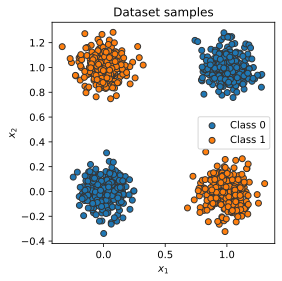

In [ ]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [ ]:
data_loader = data.DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() #loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) #optimizer

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def train_model(model, optimzer, loss_fn, data_loader, epochs=100):
  model.train()
  for epoch in tqdm(range(epochs)):
    for data_batch, labels_batch in data_loader:
      preds = model(data_batch)
      loss = loss_fn(preds.squeeze(-1), labels_batch.float())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


In [ ]:
train_model(model, optimizer, loss_fn, data_loader)

  0%|          | 0/100 [00:00<?, ?it/s]

#Evaluation

In [ ]:
test_ds = dataset_generator(500)

test_dl = data.DataLoader(test_ds, batch_size=32, shuffle=False)


In [ ]:
def eval(model, data_loader):
  model.eval()
  true_preds, num_preds = 0., 0.

  with torch.no_grad():
    for iter, (data, labels) in enumerate(data_loader):
      preds = model(data).squeeze(dim=-1)
      preds = torch.sigmoid(preds)
      preds = (preds>=0.5).long()
      true_preds += (preds == labels).sum()
      num_preds += len(labels)

  return f"{(true_preds/num_preds).item()*100}%"



In [ ]:
eval(model, test_dl)

'100.0%'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba

<ipython-input-150-dbc3a79c7c95>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


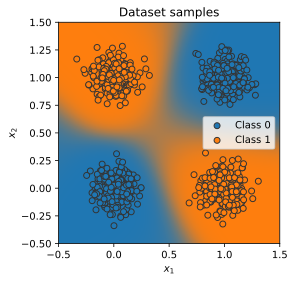

In [ ]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()